In [1]:
import matplotlib.pyplot as plt
plt.rc('font', size=12)
import pandas as pd
import seaborn as sns
import warnings 

import Coverage as cov

warnings.filterwarnings('ignore')
%matplotlib inline

%load_ext autoreload
%autoreload 2

## Params

In [2]:
#get list of client rules sorted by count
popSize = 100
clientFilename = "../Data/ICU/Best/"
# clientFilename = "../Data/ICU/Test/"
# clientFilename = "../Data/Sepsis/Best/"

ldpFilename = "../Results/ICU_Base_TEST.csv"
# ldpFilename = "../Results/ICU_Ruleset_MCTS_TEST.csv"
# ldpFilename = "../Results/ICU_TEST_2.csv"
# ldpFilename = "../Results/Sepsis_Ruleset_MCTS_Test.csv"

graphName = '../Results/Graphs/test' #Name of count coverage graphs
popThresh = 0.01 #Percentage match count


## Load Client Rules

In [3]:
# Load Client Rule Trees and Text Rule Structures, and get dataframe of rules and their counts
clientTrees, clientRules, clientDF = cov.loadClientRules(popSize, clientFilename)
clientDF

File not found for Client 8
File not found for Client 81


,Rule,Rule Count,Percent of Population
53,"((MET >= 0.000) U[0,0] (death = 0.000))",231,1.00
57,"G[0,0]((n_evts <= 0.000 -> LOS >= 0.000))",203,1.00
56,"F[0,0]((BLOOD_UREA_NITROGEN <= 0.000 & CREATIN...",74,0.74
229,"F[0,0](((af <= 0.000 | AF <= 0.000) & cosen >=...",42,0.42
47,"G[0,0]((hr >= 0.000 & Pulse >= 0.000))",39,0.39
...,...,...,...
1870,"((af <= 0.000) U[0,0] (srr <= 0.000))",1,0.01
1871,"((n_edrk <= 0.000) U[0,0] (PLATELET_COUNT >= 0...",1,0.01
1872,"G[0,0]((hr <= 0.000 -> ICU_Pt_Days <= 0.000))",1,0.01
1874,"G[0,0]((CALCIUM <= 0.000 -> SBP >= 0.000))",1,0.01


## Load LDP Ruleset

In [4]:
ldpDF, ldpTrees, ldpRules = cov.loadLDPRuleset(ldpFilename)
ldpDF

,Rule,Percent Count
1068,"G[0,0]((n_evts < 0.000 -> LOS > 0.000))",0.531
288,"G[0,0]((LOS > 0.000 -> n_evts = 0.000))",0.531
1394,"G[0,0]((n_evts < 0.000 -> LOS = 0.000))",0.531
2137,"G[0,0]((n_evts = 0.000 -> LOS = 0.000))",0.531
1287,"G[0,0]((n_evts = 0.000 -> LOS > 0.000))",0.531
...,...,...
675,"((n_evts > 0.000) U[0,0] (MET > 0.000))",0.010
1585,"((SBP = 0.000) U[0,0] (ICU_Pt_Days > 0.000))",0.010
671,"((LOS = 0.000) U[0,0] (CHLORIDE = 0.000))",0.010
1589,"((Resp < 0.000) U[0,0] (O2_Flow = 0.000))",0.010


## Complexity Analysis

In [5]:
k = 4 #k-ary tree
h = 17 #height
k**h

17179869184

## Get Table of Structure Counts - Count of rules above threshold

In [6]:
covDF, countDF, clientTrees = cov.getCoverageTable(popThresh, ldpDF, ldpTrees, clientDF)
countDF.to_csv(ldpFilename + "_CovCountDF.csv")
covDF

,Total Client Rules,Found Rules,Non Rules,Precision
0,4352,2183,0,1.0


In [7]:
countDF

,LDP Rule,Client Rule,LDP Count,Client Count
0,"((ALBUMIN = 0.000) U[0,0] (y = 0.000))","((ALBUMIN >= 0.000) U[0,0] (y = 0.000))",0.080,0.04
1,"G[0,0]((MET = 0.000 -> AF = 0.000))","G[0,0]((AF >= 0.000 -> MET <= 0.000))",0.010,0.01
2,"((y = 0.000) U[0,0] (Pulse = 0.000))","((Pulse <= 0.000) U[0,0] (y >= 0.000))",0.100,0.06
3,"((CO2 = 0.000) U[0,0] (death > 0.000))","((CO2 <= 0.000) U[0,0] (death >= 0.000))",0.010,0.01
4,"G[0,0]((Mort > 0.000 -> MET = 0.000))","G[0,0]((MET >= 0.000 -> Mort >= 0.000))",0.031,0.03
...,...,...,...,...
2178,"((ICU_Pt_Days < 0.000) U[0,0] (Glasgow_Coma_Sc...","((Glasgow_Coma_Scale_Total >= 0.000) U[0,0] (I...",0.010,0.01
2179,"((death > 0.000) U[0,0] (BLOOD_UREA_NITROGEN <...","((BLOOD_UREA_NITROGEN <= 0.000) U[0,0] (death ...",0.010,0.01
2180,"((y > 0.000) U[0,0] (CO2 = 0.000))","((CO2 <= 0.000) U[0,0] (y >= 0.000))",0.010,0.01
2181,"((SBP = 0.000) U[0,0] (y > 0.000))","((SBP <= 0.000) U[0,0] (y >= 0.000))",0.070,0.04


## Get number of unique structure types

In [8]:
structDF = cov.countUniqueStructuresNoVars(clientTrees, ldpTrees)
structDF

CLIENT STRUCT NOT FOUND F[0,0](((x <= 0.000 | x <= 0.000) & x >= 0.000))
CLIENT STRUCT NOT FOUND F[0,0]((x < 0.000 -> x = 0.000))
CLIENT STRUCT NOT FOUND F[0,0]((x >= 0.000 & x = 0.000))
CLIENT STRUCT NOT FOUND F[0,0]((x <= 0.000 & x = 0.000))
CLIENT STRUCT NOT FOUND F[0,0]((x <= 0.000 & x <= 0.000))
CLIENT STRUCT NOT FOUND F[0,0]((x > 0.000 -> x = 0.000))
CLIENT STRUCT NOT FOUND F[0,0]((x >= 0.000 & x <= 0.000))
CLIENT STRUCT NOT FOUND F[0,0]((x >= 0.000 | x >= 0.000))
CLIENT STRUCT NOT FOUND F[0,0]((x < 0.000 & x = 0.000))


In [9]:
structDF

,Total Client Structures,Found Structures,Non Structures,Precision
0,45,36,0,1.0


In [68]:
# TODO - gonna need to do some type of matching here to make sure unique structs are matched ...

In [69]:
#get client trees from table
clTrees = cov.getClientTreesFromCountDF(countDF)

In [70]:
#get number of unique structure types, ignoring vars to get sense of coverage
numUniqueStructs = cov.countUniqueStructuresNoVars(clTrees)
print("Total Unique Structures in Client Rules:", numUniqueStructs)

orig ((ALBUMIN >= 0.000) U[0,0] (y = 0.000))
no vars ((x >= 0.000) U[0,0] (x = 0.000))
orig G[0,0]((AF >= 0.000 -> MET <= 0.000))
no vars G[0,0]((x >= 0.000 -> x <= 0.000))
orig ((Pulse <= 0.000) U[0,0] (y >= 0.000))
no vars ((x <= 0.000) U[0,0] (x >= 0.000))
orig ((CO2 <= 0.000) U[0,0] (death >= 0.000))
no vars ((x <= 0.000) U[0,0] (x >= 0.000))
orig G[0,0]((MET >= 0.000 -> Mort >= 0.000))
no vars G[0,0]((x >= 0.000 -> x >= 0.000))
orig ((CALCIUM >= 0.000) U[0,0] (n_evts >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig ((ICU_Pt_Days >= 0.000) U[0,0] (tte >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig ((Mort <= 0.000) U[0,0] (tte <= 0.000))
no vars ((x <= 0.000) U[0,0] (x <= 0.000))
orig ((death <= 0.000) U[0,0] (LOS <= 0.000))
no vars ((x <= 0.000) U[0,0] (x <= 0.000))
orig ((ALT_GPT >= 0.000) U[0,0] (O2_Flow >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig ((Mort >= 0.000) U[0,0] (SpO2 >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig ((LOS >=

no vars ((x >= 0.000) U[0,0] (x <= 0.000))
orig G[0,0]((ICU_Pt_Days >= 0.000 & Mort <= 0.000))
no vars G[0,0]((x >= 0.000 & x <= 0.000))
orig ((CALCIUM <= 0.000) U[0,0] (tte <= 0.000))
no vars ((x <= 0.000) U[0,0] (x <= 0.000))
orig ((Glasgow_Coma_Scale_Total <= 0.000) U[0,0] (Pulse >= 0.000))
no vars ((x <= 0.000) U[0,0] (x >= 0.000))
orig ((direct >= 0.000) U[0,0] (tte >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig ((MET >= 0.000) U[0,0] (Mort >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig ((GLUCOSE <= 0.000) U[0,0] (LOS <= 0.000))
no vars ((x <= 0.000) U[0,0] (x <= 0.000))
orig ((LOS <= 0.000) U[0,0] (y <= 0.000))
no vars ((x <= 0.000) U[0,0] (x <= 0.000))
orig ((MET <= 0.000) U[0,0] (Mort >= 0.000))
no vars ((x <= 0.000) U[0,0] (x >= 0.000))
orig ((HEMOGLOBIN >= 0.000) U[0,0] (y = 0.000))
no vars ((x >= 0.000) U[0,0] (x = 0.000))
orig ((AST_GOT >= 0.000) U[0,0] (n_evts >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig ((direct >= 0.000) U[0,0] (y >=

no vars ((x >= 0.000) U[0,0] (x <= 0.000))
orig ((srr <= 0.000) U[0,0] (y >= 0.000))
no vars ((x <= 0.000) U[0,0] (x >= 0.000))
orig G[0,0]((n_evts >= 0.000 -> y <= 0.000))
no vars G[0,0]((x >= 0.000 -> x <= 0.000))
orig ((SBP >= 0.000) U[0,0] (tte <= 0.000))
no vars ((x >= 0.000) U[0,0] (x <= 0.000))
orig ((LOS >= 0.000) U[0,0] (tte >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig ((CHLORIDE <= 0.000) U[0,0] (death >= 0.000))
no vars ((x <= 0.000) U[0,0] (x >= 0.000))
orig ((ICU_Pt_Days >= 0.000) U[0,0] (Pulse >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig G[0,0]((death <= 0.000 | LOS >= 0.000))
no vars G[0,0]((x <= 0.000 | x >= 0.000))
orig ((direct <= 0.000) U[0,0] (Mort >= 0.000))
no vars ((x <= 0.000) U[0,0] (x >= 0.000))
orig ((LOS >= 0.000) U[0,0] (y >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig ((MET >= 0.000) U[0,0] (Pulse >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig G[0,0]((direct <= 0.000 | y <= 0.000))
no vars G[0,0]((x <= 0.

no vars ((x >= 0.000) U[0,0] (x <= 0.000))
orig ((BLOOD_UREA_NITROGEN <= 0.000) U[0,0] (tte <= 0.000))
no vars ((x <= 0.000) U[0,0] (x <= 0.000))
orig ((ALKALINE_PHOSPHATASE <= 0.000) U[0,0] (Glasgow_Coma_Scale_Total <= 0.000))
no vars ((x <= 0.000) U[0,0] (x <= 0.000))
orig G[0,0]((LOS >= 0.000 | Mort >= 0.000))
no vars G[0,0]((x >= 0.000 | x >= 0.000))
orig G[0,0]((Mort >= 0.000 -> y <= 0.000))
no vars G[0,0]((x >= 0.000 -> x <= 0.000))
orig ((CREATININE >= 0.000) U[0,0] (LOS >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig G[0,0]((LOS >= 0.000 -> Mort >= 0.000))
no vars G[0,0]((x >= 0.000 -> x >= 0.000))
orig ((Mort >= 0.000) U[0,0] (O2_Flow >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig ((death >= 0.000) U[0,0] (Resp <= 0.000))
no vars ((x >= 0.000) U[0,0] (x <= 0.000))
orig G[0,0]((direct <= 0.000 | LOS <= 0.000))
no vars G[0,0]((x <= 0.000 | x <= 0.000))
orig ((CHLORIDE <= 0.000) U[0,0] (O2_Flow >= 0.000))
no vars ((x <= 0.000) U[0,0] (x >= 0.000))
orig ((CA

no vars ((x >= 0.000) U[0,0] (x <= 0.000))
orig ((death <= 0.000) U[0,0] (LOS <= 0.000))
no vars ((x <= 0.000) U[0,0] (x <= 0.000))
orig ((ALBUMIN >= 0.000) U[0,0] (y = 0.000))
no vars ((x >= 0.000) U[0,0] (x = 0.000))
orig G[0,0]((CO2 >= 0.000 & LOS >= 0.000))
no vars G[0,0]((x >= 0.000 & x >= 0.000))
orig G[0,0]((MET >= 0.000 -> y <= 0.000))
no vars G[0,0]((x >= 0.000 -> x <= 0.000))
orig F[0,0]((death >= 0.000 & LOS >= 0.000))
no vars F[0,0]((x >= 0.000 & x >= 0.000))
orig ((MET >= 0.000) U[0,0] (Resp >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig ((LOS <= 0.000) U[0,0] (Mort >= 0.000))
no vars ((x <= 0.000) U[0,0] (x >= 0.000))
orig G[0,0]((ICU_Pt_Days <= 0.000 & LOS <= 0.000))
no vars G[0,0]((x <= 0.000 & x <= 0.000))
orig G[0,0]((BLOOD_UREA_NITROGEN >= 0.000 -> Mort <= 0.000))
no vars G[0,0]((x >= 0.000 -> x <= 0.000))
orig ((LOS <= 0.000) U[0,0] (MET <= 0.000))
no vars ((x <= 0.000) U[0,0] (x <= 0.000))
orig ((ICU_Pt_Days >= 0.000) U[0,0] (Pulse >= 0.000))
no vars ((

no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig G[0,0]((death >= 0.000 -> Glasgow_Coma_Scale_Total <= 0.000))
no vars G[0,0]((x >= 0.000 -> x <= 0.000))
orig ((BLOOD_UREA_NITROGEN <= 0.000) U[0,0] (ICU_Pt_Days >= 0.000))
no vars ((x <= 0.000) U[0,0] (x >= 0.000))
orig ((MET >= 0.000) U[0,0] (Temp >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig ((Glasgow_Coma_Scale_Total <= 0.000) U[0,0] (LOS <= 0.000))
no vars ((x <= 0.000) U[0,0] (x <= 0.000))
orig ((MET >= 0.000) U[0,0] (n_evts >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig ((direct >= 0.000) U[0,0] (Pulse >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig G[0,0]((LOS <= 0.000 -> Mort <= 0.000))
no vars G[0,0]((x <= 0.000 -> x <= 0.000))
orig ((ICU_Pt_Days >= 0.000) U[0,0] (LOS >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig ((BLOOD_UREA_NITROGEN >= 0.000) U[0,0] (y >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig ((O2_Flow >= 0.000) U[0,0] (Pulse >= 0.000))
no vars ((x >= 0.000) U[

no vars ((x <= 0.000) U[0,0] (x >= 0.000))
orig ((CHLORIDE <= 0.000) U[0,0] (ICU_Pt_Days >= 0.000))
no vars ((x <= 0.000) U[0,0] (x >= 0.000))
orig G[0,0]((Mort <= 0.000 | tte >= 0.000))
no vars G[0,0]((x <= 0.000 | x >= 0.000))
orig ((CHLORIDE <= 0.000) U[0,0] (LOS >= 0.000))
no vars ((x <= 0.000) U[0,0] (x >= 0.000))
orig ((Mort > 0.000) U[0,0] (y = 0.000))
no vars ((x > 0.000) U[0,0] (x = 0.000))
orig ((death >= 0.000) U[0,0] (n_evts <= 0.000))
no vars ((x >= 0.000) U[0,0] (x <= 0.000))
orig ((n_evts >= 0.000) U[0,0] (Resp <= 0.000))
no vars ((x >= 0.000) U[0,0] (x <= 0.000))
orig ((MET >= 0.000) U[0,0] (n_evts >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig G[0,0]((n_evts <= 0.000 -> tte >= 0.000))
no vars G[0,0]((x <= 0.000 -> x >= 0.000))
orig ((n_evts >= 0.000) U[0,0] (Resp <= 0.000))
no vars ((x >= 0.000) U[0,0] (x <= 0.000))
orig ((O2_Flow <= 0.000) U[0,0] (y >= 0.000))
no vars ((x <= 0.000) U[0,0] (x >= 0.000))
orig ((ICU_Pt_Days >= 0.000) U[0,0] (n_evts <= 0.000))

no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig G[0,0]((Mort >= 0.000 -> y >= 0.000))
no vars G[0,0]((x >= 0.000 -> x >= 0.000))
orig ((AST_GOT >= 0.000) U[0,0] (n_evts >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig G[0,0]((n_evts <= 0.000 | y <= 0.000))
no vars G[0,0]((x <= 0.000 | x <= 0.000))
orig G[0,0]((ICU_Pt_Days >= 0.000 | n_evts <= 0.000))
no vars G[0,0]((x >= 0.000 | x <= 0.000))
orig G[0,0]((Glasgow_Coma_Scale_Total <= 0.000 -> n_evts >= 0.000))
no vars G[0,0]((x <= 0.000 -> x >= 0.000))
orig ((death < 0.000) U[0,0] (y = 0.000))
no vars ((x < 0.000) U[0,0] (x = 0.000))
orig ((CHLORIDE <= 0.000) U[0,0] (O2_Flow >= 0.000))
no vars ((x <= 0.000) U[0,0] (x >= 0.000))
orig G[0,0]((ICU_Pt_Days >= 0.000 | Mort <= 0.000))
no vars G[0,0]((x >= 0.000 | x <= 0.000))
orig ((CALCIUM >= 0.000) U[0,0] (LOS <= 0.000))
no vars ((x >= 0.000) U[0,0] (x <= 0.000))
orig ((death >= 0.000) U[0,0] (direct >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig ((O2_Flow >= 0.000) U[0

no vars G[0,0]((x <= 0.000 | x <= 0.000))
orig G[0,0]((n_edrk >= 0.000 | n_evts >= 0.000))
no vars G[0,0]((x >= 0.000 | x >= 0.000))
orig ((CREATININE >= 0.000) U[0,0] (death <= 0.000))
no vars ((x >= 0.000) U[0,0] (x <= 0.000))
orig ((AST_GOT >= 0.000) U[0,0] (tte <= 0.000))
no vars ((x >= 0.000) U[0,0] (x <= 0.000))
orig ((direct <= 0.000) U[0,0] (Resp <= 0.000))
no vars ((x <= 0.000) U[0,0] (x <= 0.000))
orig ((ICU_Pt_Days >= 0.000) U[0,0] (Mort <= 0.000))
no vars ((x >= 0.000) U[0,0] (x <= 0.000))
orig G[0,0]((AF <= 0.000 -> LOS <= 0.000))
no vars G[0,0]((x <= 0.000 -> x <= 0.000))
orig G[0,0]((edrk >= 0.000 -> Mort <= 0.000))
no vars G[0,0]((x >= 0.000 -> x <= 0.000))
orig ((Sgy >= 0.000) U[0,0] (y = 0.000))
no vars ((x >= 0.000) U[0,0] (x = 0.000))
orig ((death >= 0.000) U[0,0] (Glasgow_Coma_Scale_Total >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig ((Glasgow_Coma_Scale_Total <= 0.000) U[0,0] (Mort <= 0.000))
no vars ((x <= 0.000) U[0,0] (x <= 0.000))
orig ((GLUCOSE >

no vars G[0,0]((x >= 0.000 -> x >= 0.000))
orig ((Glasgow_Coma_Scale_Total <= 0.000) U[0,0] (y >= 0.000))
no vars ((x <= 0.000) U[0,0] (x >= 0.000))
orig ((O2_Flow >= 0.000) U[0,0] (Resp >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig ((CO2 >= 0.000) U[0,0] (ICU_Pt_Days >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig ((MET >= 0.000) U[0,0] (Pulse >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig G[0,0]((MET >= 0.000 | Mort <= 0.000))
no vars G[0,0]((x >= 0.000 | x <= 0.000))
orig ((Glasgow_Coma_Scale_Total <= 0.000) U[0,0] (MET >= 0.000))
no vars ((x <= 0.000) U[0,0] (x >= 0.000))
orig G[0,0]((Mort >= 0.000 | n_evts <= 0.000))
no vars G[0,0]((x >= 0.000 | x <= 0.000))
orig ((Glasgow_Coma_Scale_Total <= 0.000) U[0,0] (SBP <= 0.000))
no vars ((x <= 0.000) U[0,0] (x <= 0.000))
orig ((MET >= 0.000) U[0,0] (n_evts >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig ((Mort >= 0.000) U[0,0] (O2_Flow >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
or

no vars G[0,0]((x >= 0.000 | x <= 0.000))
orig ((O2_Flow >= 0.000) U[0,0] (SpO2 >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig ((CO2 <= 0.000) U[0,0] (direct >= 0.000))
no vars ((x <= 0.000) U[0,0] (x >= 0.000))
orig ((Mort >= 0.000) U[0,0] (O2_Flow >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig ((Mort >= 0.000) U[0,0] (O2_Flow >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig ((CREATININE >= 0.000) U[0,0] (Glasgow_Coma_Scale_Total <= 0.000))
no vars ((x >= 0.000) U[0,0] (x <= 0.000))
orig ((direct >= 0.000) U[0,0] (Glasgow_Coma_Scale_Total >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig ((direct <= 0.000) U[0,0] (LOS >= 0.000))
no vars ((x <= 0.000) U[0,0] (x >= 0.000))
orig ((death >= 0.000) U[0,0] (n_evts >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig ((ICU_Pt_Days <= 0.000) U[0,0] (O2_Flow >= 0.000))
no vars ((x <= 0.000) U[0,0] (x >= 0.000))
orig ((ALT_GPT <= 0.000) U[0,0] (y = 0.000))
no vars ((x <= 0.000) U[0,0] (x = 0.000)

no vars G[0,0]((x <= 0.000 | x >= 0.000))
orig ((CREATININE <= 0.000) U[0,0] (death >= 0.000))
no vars ((x <= 0.000) U[0,0] (x >= 0.000))
orig ((CHLORIDE <= 0.000) U[0,0] (Mort >= 0.000))
no vars ((x <= 0.000) U[0,0] (x >= 0.000))
orig ((n_evts > 0.000) U[0,0] (y = 0.000))
no vars ((x > 0.000) U[0,0] (x = 0.000))
orig ((direct >= 0.000) U[0,0] (LOS >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig ((CREATININE >= 0.000) U[0,0] (n_evts >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig ((death >= 0.000) U[0,0] (Mort <= 0.000))
no vars ((x >= 0.000) U[0,0] (x <= 0.000))
orig ((BLOOD_UREA_NITROGEN <= 0.000) U[0,0] (Mort >= 0.000))
no vars ((x <= 0.000) U[0,0] (x >= 0.000))
orig ((ALT_GPT >= 0.000) U[0,0] (death >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig ((O2_Flow <= 0.000) U[0,0] (tte <= 0.000))
no vars ((x <= 0.000) U[0,0] (x <= 0.000))
orig ((Resp <= 0.000) U[0,0] (tte <= 0.000))
no vars ((x <= 0.000) U[0,0] (x <= 0.000))
orig ((n_evts >= 0.000) U[0,0] (

no vars ((x <= 0.000) U[0,0] (x >= 0.000))
orig ((LOS >= 0.000) U[0,0] (MET >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig ((direct >= 0.000) U[0,0] (GLUCOSE <= 0.000))
no vars ((x >= 0.000) U[0,0] (x <= 0.000))
orig ((Glasgow_Coma_Scale_Total <= 0.000) U[0,0] (MET >= 0.000))
no vars ((x <= 0.000) U[0,0] (x >= 0.000))
orig ((ICU_Pt_Days >= 0.000) U[0,0] (Temp >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig ((CREATININE >= 0.000) U[0,0] (MET >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig ((Glasgow_Coma_Scale_Total >= 0.000) U[0,0] (Mort >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig ((death <= 0.000) U[0,0] (tte <= 0.000))
no vars ((x <= 0.000) U[0,0] (x <= 0.000))
orig G[0,0]((Mort >= 0.000 | n_evts <= 0.000))
no vars G[0,0]((x >= 0.000 | x <= 0.000))
orig G[0,0]((direct <= 0.000 | SpO2 <= 0.000))
no vars G[0,0]((x <= 0.000 | x <= 0.000))
orig ((HEMOGLOBIN >= 0.000) U[0,0] (tte <= 0.000))
no vars ((x >= 0.000) U[0,0] (x <= 0.000))
orig ((G

no vars G[0,0]((x <= 0.000 -> x >= 0.000))
orig ((Glasgow_Coma_Scale_Total <= 0.000) U[0,0] (n_evts >= 0.000))
no vars ((x <= 0.000) U[0,0] (x >= 0.000))
orig ((O2_Flow <= 0.000) U[0,0] (y >= 0.000))
no vars ((x <= 0.000) U[0,0] (x >= 0.000))
orig G[0,0]((tte <= 0.000 -> y = 0.000))
no vars G[0,0]((x <= 0.000 -> x = 0.000))
orig ((ICU_Pt_Days >= 0.000) U[0,0] (tte <= 0.000))
no vars ((x >= 0.000) U[0,0] (x <= 0.000))
orig ((CHLORIDE >= 0.000) U[0,0] (Glasgow_Coma_Scale_Total <= 0.000))
no vars ((x >= 0.000) U[0,0] (x <= 0.000))
orig ((ICU_Pt_Days <= 0.000) U[0,0] (Resp >= 0.000))
no vars ((x <= 0.000) U[0,0] (x >= 0.000))
orig ((death >= 0.000) U[0,0] (SBP >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig ((LOS >= 0.000) U[0,0] (O2_Flow >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig ((ALBUMIN >= 0.000) U[0,0] (MET <= 0.000))
no vars ((x >= 0.000) U[0,0] (x <= 0.000))
orig G[0,0]((cosen >= 0.000 -> LOS >= 0.000))
no vars G[0,0]((x >= 0.000 -> x >= 0.000))
orig G[0,0

no vars ((x <= 0.000) U[0,0] (x <= 0.000))
orig ((ICU_Pt_Days >= 0.000) U[0,0] (Mort <= 0.000))
no vars ((x >= 0.000) U[0,0] (x <= 0.000))
orig ((ALKALINE_PHOSPHATASE <= 0.000) U[0,0] (n_evts >= 0.000))
no vars ((x <= 0.000) U[0,0] (x >= 0.000))
orig ((CHLORIDE >= 0.000) U[0,0] (y >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig ((CO2 >= 0.000) U[0,0] (n_evts >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig ((GLUCOSE >= 0.000) U[0,0] (HEMOGLOBIN >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig ((Mort >= 0.000) U[0,0] (SpO2 >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig ((Glasgow_Coma_Scale_Total >= 0.000) U[0,0] (ICU_Pt_Days >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig G[0,0]((LOS <= 0.000 | MET >= 0.000))
no vars G[0,0]((x <= 0.000 | x >= 0.000))
orig ((O2_Flow <= 0.000) U[0,0] (Resp <= 0.000))
no vars ((x <= 0.000) U[0,0] (x <= 0.000))
orig ((direct >= 0.000) U[0,0] (y >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig (

no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig ((ALKALINE_PHOSPHATASE > 0.000) U[0,0] (y = 0.000))
no vars ((x > 0.000) U[0,0] (x = 0.000))
orig G[0,0]((ICU_Pt_Days >= 0.000 | Mort <= 0.000))
no vars G[0,0]((x >= 0.000 | x <= 0.000))
orig ((HEMOGLOBIN >= 0.000) U[0,0] (LACTIC_ACID >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig ((Temp >= 0.000) U[0,0] (y >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig G[0,0]((LOS <= 0.000 -> y = 0.000))
no vars G[0,0]((x <= 0.000 -> x = 0.000))
orig ((death >= 0.000) U[0,0] (y >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig ((O2_Flow <= 0.000) U[0,0] (y >= 0.000))
no vars ((x <= 0.000) U[0,0] (x >= 0.000))
orig ((BLOOD_UREA_NITROGEN <= 0.000) U[0,0] (n_evts >= 0.000))
no vars ((x <= 0.000) U[0,0] (x >= 0.000))
orig ((death >= 0.000) U[0,0] (y >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig ((CALCIUM >= 0.000) U[0,0] (Mort >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig G[0,0]((ICU_Pt_Days <= 0.000

no vars ((x >= 0.000) U[0,0] (x <= 0.000))
orig ((CREATININE >= 0.000) U[0,0] (MET >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig ((Glasgow_Coma_Scale_Total >= 0.000) U[0,0] (Pulse >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig ((Glasgow_Coma_Scale_Total <= 0.000) U[0,0] (Resp <= 0.000))
no vars ((x <= 0.000) U[0,0] (x <= 0.000))
orig G[0,0]((death >= 0.000 -> Mort <= 0.000))
no vars G[0,0]((x >= 0.000 -> x <= 0.000))
orig ((Glasgow_Coma_Scale_Total >= 0.000) U[0,0] (y >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig ((HEMOGLOBIN >= 0.000) U[0,0] (MET >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig ((LOS >= 0.000) U[0,0] (Temp <= 0.000))
no vars ((x >= 0.000) U[0,0] (x <= 0.000))
orig ((ICU_Pt_Days <= 0.000) U[0,0] (y >= 0.000))
no vars ((x <= 0.000) U[0,0] (x >= 0.000))
orig G[0,0]((direct <= 0.000 -> LOS >= 0.000))
no vars G[0,0]((x <= 0.000 -> x >= 0.000))
orig ((Temp <= 0.000) U[0,0] (tte <= 0.000))
no vars ((x <= 0.000) U[0,0] (x <= 0.0

no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig G[0,0]((ICU_Pt_Days <= 0.000 | Mort >= 0.000))
no vars G[0,0]((x <= 0.000 | x >= 0.000))
orig ((LOS >= 0.000) U[0,0] (O2_Flow >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig ((GLUCOSE >= 0.000) U[0,0] (ICU_Pt_Days >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig G[0,0]((LOS >= 0.000 | tte <= 0.000))
no vars G[0,0]((x >= 0.000 | x <= 0.000))
orig ((LOS <= 0.000) U[0,0] (y <= 0.000))
no vars ((x <= 0.000) U[0,0] (x <= 0.000))
orig ((Glasgow_Coma_Scale_Total >= 0.000) U[0,0] (n_evts >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig ((CALCIUM >= 0.000) U[0,0] (n_evts >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig ((CALCIUM >= 0.000) U[0,0] (CO2 >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig ((Mort <= 0.000) U[0,0] (tte <= 0.000))
no vars ((x <= 0.000) U[0,0] (x <= 0.000))
orig G[0,0]((death >= 0.000 | Mort <= 0.000))
no vars G[0,0]((x >= 0.000 | x <= 0.000))
orig ((Glasgow_Coma_Scale_Total

no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig ((n_evts >= 0.000) U[0,0] (SpO2 >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig ((MET >= 0.000) U[0,0] (death = 0.000))
no vars ((x >= 0.000) U[0,0] (x = 0.000))
orig ((LOS >= 0.000) U[0,0] (SBP >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig ((ICU_Pt_Days <= 0.000) U[0,0] (Mort >= 0.000))
no vars ((x <= 0.000) U[0,0] (x >= 0.000))
orig G[0,0]((death <= 0.000 | ICU_Pt_Days <= 0.000))
no vars G[0,0]((x <= 0.000 | x <= 0.000))
orig ((death <= 0.000) U[0,0] (y >= 0.000))
no vars ((x <= 0.000) U[0,0] (x >= 0.000))
orig ((CREATININE >= 0.000) U[0,0] (Mort >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig ((HEMOGLOBIN >= 0.000) U[0,0] (MET >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig ((Mort <= 0.000) U[0,0] (Temp >= 0.000))
no vars ((x <= 0.000) U[0,0] (x >= 0.000))
orig ((CO2 <= 0.000) U[0,0] (death >= 0.000))
no vars ((x <= 0.000) U[0,0] (x >= 0.000))
orig ((CREATININE >= 0.000) U[0,0] (death <= 0.

orig G[0,0]((LOS <= 0.000 | MET >= 0.000))
no vars G[0,0]((x <= 0.000 | x >= 0.000))
orig ((GLUCOSE >= 0.000) U[0,0] (y = 0.000))
no vars ((x >= 0.000) U[0,0] (x = 0.000))
orig G[0,0]((LOS >= 0.000 | tte <= 0.000))
no vars G[0,0]((x >= 0.000 | x <= 0.000))
orig ((BLOOD_UREA_NITROGEN <= 0.000) U[0,0] (n_evts >= 0.000))
no vars ((x <= 0.000) U[0,0] (x >= 0.000))
orig ((n_evts >= 0.000) U[0,0] (y <= 0.000))
no vars ((x >= 0.000) U[0,0] (x <= 0.000))
orig G[0,0]((death <= 0.000 | ICU_Pt_Days <= 0.000))
no vars G[0,0]((x <= 0.000 | x <= 0.000))
orig ((CALCIUM <= 0.000) U[0,0] (O2_Flow >= 0.000))
no vars ((x <= 0.000) U[0,0] (x >= 0.000))
orig G[0,0]((ICU_Pt_Days >= 0.000 | Mort <= 0.000))
no vars G[0,0]((x >= 0.000 | x <= 0.000))
orig ((O2_Flow >= 0.000) U[0,0] (SBP <= 0.000))
no vars ((x >= 0.000) U[0,0] (x <= 0.000))
orig G[0,0]((MET >= 0.000 -> y >= 0.000))
no vars G[0,0]((x >= 0.000 -> x >= 0.000))
orig ((death <= 0.000) U[0,0] (MET >= 0.000))
no vars ((x <= 0.000) U[0,0] (x >= 0.000))


no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig ((Pulse >= 0.000) U[0,0] (tte <= 0.000))
no vars ((x >= 0.000) U[0,0] (x <= 0.000))
orig ((CHLORIDE >= 0.000) U[0,0] (Pulse >= 0.000))
no vars ((x >= 0.000) U[0,0] (x >= 0.000))
orig G[0,0]((AF <= 0.000 -> death <= 0.000))
no vars G[0,0]((x <= 0.000 -> x <= 0.000))
orig G[0,0]((Mort >= 0.000 -> y <= 0.000))
no vars G[0,0]((x >= 0.000 -> x <= 0.000))
orig ((direct >= 0.000) U[0,0] (LOS <= 0.000))
no vars ((x >= 0.000) U[0,0] (x <= 0.000))
orig G[0,0]((death <= 0.000 | tte >= 0.000))
no vars G[0,0]((x <= 0.000 | x >= 0.000))
orig G[0,0]((MET >= 0.000 | n_edrk >= 0.000))
no vars G[0,0]((x >= 0.000 | x >= 0.000))
orig ((direct <= 0.000) U[0,0] (MET <= 0.000))
no vars ((x <= 0.000) U[0,0] (x <= 0.000))
orig G[0,0]((MET >= 0.000 -> y <= 0.000))
no vars G[0,0]((x >= 0.000 -> x <= 0.000))
orig G[0,0]((n_evts >= 0.000 -> tte <= 0.000))
no vars G[0,0]((x >= 0.000 -> x <= 0.000))
orig ((Glasgow_Coma_Scale_Total >= 0.000) U[0,0] (tte <= 0.000))
no va

In [71]:
#get number of unique structure types, ignoring vars to get sense of coverage
numUniqueStructs = cov.countUniqueStructuresNoVars(ldpTrees)
print("Total Unique Structures in LDP Rules:", numUniqueStructs)

orig ((ALBUMIN = 0.000) U[0,0] (y = 0.000))
no vars ((x = 0.000) U[0,0] (x = 0.000))
orig G[0,0]((MET = 0.000 -> AF = 0.000))
no vars G[0,0]((x = 0.000 -> x = 0.000))
orig ((y = 0.000) U[0,0] (Pulse = 0.000))
no vars ((x = 0.000) U[0,0] (x = 0.000))
orig ((CO2 = 0.000) U[0,0] (death > 0.000))
no vars ((x = 0.000) U[0,0] (x > 0.000))
orig G[0,0]((Mort > 0.000 -> MET = 0.000))
no vars G[0,0]((x > 0.000 -> x = 0.000))
orig ((CALCIUM = 0.000) U[0,0] (n_evts = 0.000))
no vars ((x = 0.000) U[0,0] (x = 0.000))
orig ((ICU_Pt_Days > 0.000) U[0,0] (tte > 0.000))
no vars ((x > 0.000) U[0,0] (x > 0.000))
orig ((Mort = 0.000) U[0,0] (tte < 0.000))
no vars ((x = 0.000) U[0,0] (x < 0.000))
orig ((LOS = 0.000) U[0,0] (death < 0.000))
no vars ((x = 0.000) U[0,0] (x < 0.000))
orig ((O2_Flow = 0.000) U[0,0] (ALT_GPT = 0.000))
no vars ((x = 0.000) U[0,0] (x = 0.000))
orig ((SpO2 > 0.000) U[0,0] (Mort = 0.000))
no vars ((x > 0.000) U[0,0] (x = 0.000))
orig ((LOS = 0.000) U[0,0] (y = 0.000))
no vars ((x = 0

no vars ((x > 0.000) U[0,0] (x = 0.000))
orig ((MET < 0.000) U[0,0] (ALBUMIN > 0.000))
no vars ((x < 0.000) U[0,0] (x > 0.000))
orig ((CHLORIDE = 0.000) U[0,0] (O2_Flow < 0.000))
no vars ((x = 0.000) U[0,0] (x < 0.000))
orig ((LOS < 0.000) U[0,0] (tte = 0.000))
no vars ((x < 0.000) U[0,0] (x = 0.000))
orig G[0,0]((n_evts < 0.000 | Mort < 0.000))
no vars G[0,0]((x < 0.000 | x < 0.000))
orig ((tte > 0.000) U[0,0] (O2_Flow > 0.000))
no vars ((x > 0.000) U[0,0] (x > 0.000))
orig G[0,0]((ICU_Pt_Days = 0.000 -> y = 0.000))
no vars G[0,0]((x = 0.000 -> x = 0.000))
orig ((n_evts > 0.000) U[0,0] (ICU_Pt_Days < 0.000))
no vars ((x > 0.000) U[0,0] (x < 0.000))
orig ((y > 0.000) U[0,0] (LOS = 0.000))
no vars ((x > 0.000) U[0,0] (x = 0.000))
orig G[0,0]((death = 0.000 -> LOS > 0.000))
no vars G[0,0]((x = 0.000 -> x > 0.000))
orig ((death > 0.000) U[0,0] (CALCIUM = 0.000))
no vars ((x > 0.000) U[0,0] (x = 0.000))
orig G[0,0]((Mort = 0.000 -> Resp < 0.000))
no vars G[0,0]((x = 0.000 -> x < 0.000))
or

orig ((O2_Flow < 0.000) U[0,0] (n_evts > 0.000))
no vars ((x < 0.000) U[0,0] (x > 0.000))
orig ((direct < 0.000) U[0,0] (Glasgow_Coma_Scale_Total = 0.000))
no vars ((x < 0.000) U[0,0] (x = 0.000))
orig G[0,0]((n_evts < 0.000 -> MET = 0.000))
no vars G[0,0]((x < 0.000 -> x = 0.000))
orig ((death > 0.000) U[0,0] (Glasgow_Coma_Scale_Total = 0.000))
no vars ((x > 0.000) U[0,0] (x = 0.000))
orig G[0,0]((Mort = 0.000 -> y > 0.000))
no vars G[0,0]((x = 0.000 -> x > 0.000))
orig ((Mort > 0.000) U[0,0] (SBP = 0.000))
no vars ((x > 0.000) U[0,0] (x = 0.000))
orig ((HEMOGLOBIN = 0.000) U[0,0] (GLUCOSE = 0.000))
no vars ((x = 0.000) U[0,0] (x = 0.000))
orig G[0,0]((MET = 0.000 | n_evts = 0.000))
no vars G[0,0]((x = 0.000 | x = 0.000))
orig ((direct > 0.000) U[0,0] (O2_Flow > 0.000))
no vars ((x > 0.000) U[0,0] (x > 0.000))
orig ((y = 0.000) U[0,0] (Glasgow_Coma_Scale_Total = 0.000))
no vars ((x = 0.000) U[0,0] (x = 0.000))
orig ((y = 0.000) U[0,0] (Sgy = 0.000))
no vars ((x = 0.000) U[0,0] (x = 0.

no vars ((x = 0.000) U[0,0] (x > 0.000))
orig ((n_evts = 0.000) U[0,0] (GLUCOSE = 0.000))
no vars ((x = 0.000) U[0,0] (x = 0.000))
orig G[0,0]((Mort < 0.000 | n_evts < 0.000))
no vars G[0,0]((x < 0.000 | x < 0.000))
orig ((ALBUMIN < 0.000) U[0,0] (LOS = 0.000))
no vars ((x < 0.000) U[0,0] (x = 0.000))
orig ((Resp = 0.000) U[0,0] (y > 0.000))
no vars ((x = 0.000) U[0,0] (x > 0.000))
orig ((MET > 0.000) U[0,0] (BLOOD_UREA_NITROGEN = 0.000))
no vars ((x > 0.000) U[0,0] (x = 0.000))
orig ((Glasgow_Coma_Scale_Total > 0.000) U[0,0] (death = 0.000))
no vars ((x > 0.000) U[0,0] (x = 0.000))
orig ((Sgy > 0.000) U[0,0] (y = 0.000))
no vars ((x > 0.000) U[0,0] (x = 0.000))
orig ((MET > 0.000) U[0,0] (Glasgow_Coma_Scale_Total = 0.000))
no vars ((x > 0.000) U[0,0] (x = 0.000))
orig ((ICU_Pt_Days = 0.000) U[0,0] (Temp = 0.000))
no vars ((x = 0.000) U[0,0] (x = 0.000))
orig ((O2_Flow = 0.000) U[0,0] (ALT_GPT > 0.000))
no vars ((x = 0.000) U[0,0] (x > 0.000))
orig ((y > 0.000) U[0,0] (ALBUMIN = 0.000)

no vars G[0,0]((x < 0.000 -> x = 0.000))
orig F[0,0]((LOS = 0.000 & death > 0.000))
no vars F[0,0]((x = 0.000 & x > 0.000))
orig ((Resp = 0.000) U[0,0] (MET = 0.000))
no vars ((x = 0.000) U[0,0] (x = 0.000))
orig ((LOS < 0.000) U[0,0] (Mort > 0.000))
no vars ((x < 0.000) U[0,0] (x > 0.000))
orig G[0,0]((LOS < 0.000 & ICU_Pt_Days < 0.000))
no vars G[0,0]((x < 0.000 & x < 0.000))
orig G[0,0]((BLOOD_UREA_NITROGEN > 0.000 -> Mort = 0.000))
no vars G[0,0]((x > 0.000 -> x = 0.000))
orig ((MET < 0.000) U[0,0] (LOS < 0.000))
no vars ((x < 0.000) U[0,0] (x < 0.000))
orig ((Pulse = 0.000) U[0,0] (ICU_Pt_Days > 0.000))
no vars ((x = 0.000) U[0,0] (x > 0.000))
orig ((tte = 0.000) U[0,0] (Temp = 0.000))
no vars ((x = 0.000) U[0,0] (x = 0.000))
orig ((n_evts = 0.000) U[0,0] (Mort = 0.000))
no vars ((x = 0.000) U[0,0] (x = 0.000))
orig ((Glasgow_Coma_Scale_Total = 0.000) U[0,0] (LOS = 0.000))
no vars ((x = 0.000) U[0,0] (x = 0.000))
orig ((BLOOD_UREA_NITROGEN = 0.000) U[0,0] (y = 0.000))
no vars ((x 

no vars ((x < 0.000) U[0,0] (x < 0.000))
orig G[0,0]((y > 0.000 -> ICU_Pt_Days < 0.000))
no vars G[0,0]((x > 0.000 -> x < 0.000))
orig ((O2_Flow > 0.000) U[0,0] (Temp > 0.000))
no vars ((x > 0.000) U[0,0] (x > 0.000))
orig ((Glasgow_Coma_Scale_Total > 0.000) U[0,0] (ICU_Pt_Days < 0.000))
no vars ((x > 0.000) U[0,0] (x < 0.000))
orig ((Temp > 0.000) U[0,0] (n_evts > 0.000))
no vars ((x > 0.000) U[0,0] (x > 0.000))
orig ((CREATININE > 0.000) U[0,0] (y = 0.000))
no vars ((x > 0.000) U[0,0] (x = 0.000))
orig ((n_evts > 0.000) U[0,0] (Resp = 0.000))
no vars ((x > 0.000) U[0,0] (x = 0.000))
orig ((srr = 0.000) U[0,0] (CHLORIDE = 0.000))
no vars ((x = 0.000) U[0,0] (x = 0.000))
orig ((CALCIUM = 0.000) U[0,0] (SBP = 0.000))
no vars ((x = 0.000) U[0,0] (x = 0.000))
orig ((direct > 0.000) U[0,0] (GLUCOSE = 0.000))
no vars ((x > 0.000) U[0,0] (x = 0.000))
orig ((Temp = 0.000) U[0,0] (y > 0.000))
no vars ((x = 0.000) U[0,0] (x > 0.000))
orig G[0,0]((LOS = 0.000 & ICU_Pt_Days = 0.000))
no vars G[0,

no vars ((x > 0.000) U[0,0] (x = 0.000))
orig ((srr = 0.000) U[0,0] (ICU_Pt_Days > 0.000))
no vars ((x = 0.000) U[0,0] (x > 0.000))
orig ((ALBUMIN = 0.000) U[0,0] (ICU_Pt_Days < 0.000))
no vars ((x = 0.000) U[0,0] (x < 0.000))
orig ((MET = 0.000) U[0,0] (ICU_Pt_Days = 0.000))
no vars ((x = 0.000) U[0,0] (x = 0.000))
orig ((ALBUMIN > 0.000) U[0,0] (y = 0.000))
no vars ((x > 0.000) U[0,0] (x = 0.000))
orig G[0,0]((ICU_Pt_Days < 0.000 & LOS < 0.000))
no vars G[0,0]((x < 0.000 & x < 0.000))
orig ((Glasgow_Coma_Scale_Total = 0.000) U[0,0] (MET < 0.000))
no vars ((x = 0.000) U[0,0] (x < 0.000))
orig ((ICU_Pt_Days = 0.000) U[0,0] (death < 0.000))
no vars ((x = 0.000) U[0,0] (x < 0.000))
orig ((n_evts > 0.000) U[0,0] (MET = 0.000))
no vars ((x > 0.000) U[0,0] (x = 0.000))
orig G[0,0]((tte < 0.000 | LOS = 0.000))
no vars G[0,0]((x < 0.000 | x = 0.000))
orig ((Mort < 0.000) U[0,0] (death > 0.000))
no vars ((x < 0.000) U[0,0] (x > 0.000))
orig ((Temp > 0.000) U[0,0] (death > 0.000))
no vars ((x >

no vars G[0,0]((x > 0.000 | x = 0.000))
orig ((Resp = 0.000) U[0,0] (death = 0.000))
no vars ((x = 0.000) U[0,0] (x = 0.000))
orig ((CO2 = 0.000) U[0,0] (n_evts > 0.000))
no vars ((x = 0.000) U[0,0] (x > 0.000))
orig G[0,0]((y = 0.000 -> death = 0.000))
no vars G[0,0]((x = 0.000 -> x = 0.000))
orig G[0,0]((n_evts = 0.000 | ICU_Pt_Days > 0.000))
no vars G[0,0]((x = 0.000 | x > 0.000))
orig ((Glasgow_Coma_Scale_Total > 0.000) U[0,0] (tte < 0.000))
no vars ((x > 0.000) U[0,0] (x < 0.000))
orig ((tte < 0.000) U[0,0] (Mort < 0.000))
no vars ((x < 0.000) U[0,0] (x < 0.000))
orig ((LOS > 0.000) U[0,0] (Mort > 0.000))
no vars ((x > 0.000) U[0,0] (x > 0.000))
orig ((Mort = 0.000) U[0,0] (SBP = 0.000))
no vars ((x = 0.000) U[0,0] (x = 0.000))
orig ((O2_Flow < 0.000) U[0,0] (Resp = 0.000))
no vars ((x < 0.000) U[0,0] (x = 0.000))
orig ((Glasgow_Coma_Scale_Total > 0.000) U[0,0] (y > 0.000))
no vars ((x > 0.000) U[0,0] (x > 0.000))
orig ((CREATININE = 0.000) U[0,0] (n_evts > 0.000))
no vars ((x = 0

no vars G[0,0]((x > 0.000 & x > 0.000))
orig ((LOS = 0.000) U[0,0] (MET < 0.000))
no vars ((x = 0.000) U[0,0] (x < 0.000))
orig ((direct = 0.000) U[0,0] (O2_Flow = 0.000))
no vars ((x = 0.000) U[0,0] (x = 0.000))
orig ((Glasgow_Coma_Scale_Total < 0.000) U[0,0] (MET > 0.000))
no vars ((x < 0.000) U[0,0] (x > 0.000))
orig ((direct > 0.000) U[0,0] (ICU_Pt_Days > 0.000))
no vars ((x > 0.000) U[0,0] (x > 0.000))
orig ((LOS > 0.000) U[0,0] (GLUCOSE = 0.000))
no vars ((x > 0.000) U[0,0] (x = 0.000))
orig ((Glasgow_Coma_Scale_Total = 0.000) U[0,0] (Resp < 0.000))
no vars ((x = 0.000) U[0,0] (x < 0.000))
orig G[0,0]((direct = 0.000 -> n_evts < 0.000))
no vars G[0,0]((x = 0.000 -> x < 0.000))
orig ((HEMOGLOBIN = 0.000) U[0,0] (ICU_Pt_Days = 0.000))
no vars ((x = 0.000) U[0,0] (x = 0.000))
orig ((tte < 0.000) U[0,0] (Glasgow_Coma_Scale_Total < 0.000))
no vars ((x < 0.000) U[0,0] (x < 0.000))
orig ((GLUCOSE = 0.000) U[0,0] (n_evts > 0.000))
no vars ((x = 0.000) U[0,0] (x > 0.000))
orig ((CALCIUM =

no vars ((x = 0.000) U[0,0] (x = 0.000))
orig G[0,0]((y < 0.000 | tte < 0.000))
no vars G[0,0]((x < 0.000 | x < 0.000))
orig ((SBP > 0.000) U[0,0] (y > 0.000))
no vars ((x > 0.000) U[0,0] (x > 0.000))
orig ((Glasgow_Coma_Scale_Total = 0.000) U[0,0] (O2_Flow < 0.000))
no vars ((x = 0.000) U[0,0] (x < 0.000))
orig ((MET < 0.000) U[0,0] (n_evts > 0.000))
no vars ((x < 0.000) U[0,0] (x > 0.000))
orig G[0,0]((death = 0.000 | n_evts = 0.000))
no vars G[0,0]((x = 0.000 | x = 0.000))
orig ((y > 0.000) U[0,0] (direct < 0.000))
no vars ((x > 0.000) U[0,0] (x < 0.000))
orig ((y > 0.000) U[0,0] (O2_Flow = 0.000))
no vars ((x > 0.000) U[0,0] (x = 0.000))
orig G[0,0]((LOS = 0.000 | Mort < 0.000))
no vars G[0,0]((x = 0.000 | x < 0.000))
orig ((Resp = 0.000) U[0,0] (MET > 0.000))
no vars ((x = 0.000) U[0,0] (x > 0.000))
orig ((y = 0.000) U[0,0] (Temp > 0.000))
no vars ((x = 0.000) U[0,0] (x > 0.000))
orig G[0,0]((Mort = 0.000 | n_edrk > 0.000))
no vars G[0,0]((x = 0.000 | x > 0.000))
orig ((LOS < 0.00

no vars ((x = 0.000) U[0,0] (x > 0.000))
orig ((direct > 0.000) U[0,0] (Glasgow_Coma_Scale_Total < 0.000))
no vars ((x > 0.000) U[0,0] (x < 0.000))
orig ((Mort > 0.000) U[0,0] (O2_Flow < 0.000))
no vars ((x > 0.000) U[0,0] (x < 0.000))
orig ((MET > 0.000) U[0,0] (y > 0.000))
no vars ((x > 0.000) U[0,0] (x > 0.000))
orig G[0,0]((n_evts = 0.000 | ICU_Pt_Days = 0.000))
no vars G[0,0]((x = 0.000 | x = 0.000))
orig ((n_evts = 0.000) U[0,0] (y > 0.000))
no vars ((x = 0.000) U[0,0] (x > 0.000))
orig ((ICU_Pt_Days = 0.000) U[0,0] (LOS = 0.000))
no vars ((x = 0.000) U[0,0] (x = 0.000))
orig ((death > 0.000) U[0,0] (PLATELET_COUNT = 0.000))
no vars ((x > 0.000) U[0,0] (x = 0.000))
orig ((HEMOGLOBIN = 0.000) U[0,0] (LOS = 0.000))
no vars ((x = 0.000) U[0,0] (x = 0.000))
orig ((O2_Flow > 0.000) U[0,0] (Resp > 0.000))
no vars ((x > 0.000) U[0,0] (x > 0.000))
orig ((Pulse = 0.000) U[0,0] (ALKALINE_PHOSPHATASE = 0.000))
no vars ((x = 0.000) U[0,0] (x = 0.000))
orig ((O2_Flow > 0.000) U[0,0] (y = 0.00

no vars ((x = 0.000) U[0,0] (x = 0.000))
orig ((SBP = 0.000) U[0,0] (CHLORIDE = 0.000))
no vars ((x = 0.000) U[0,0] (x = 0.000))
orig ((direct = 0.000) U[0,0] (CHLORIDE = 0.000))
no vars ((x = 0.000) U[0,0] (x = 0.000))
orig G[0,0]((y < 0.000 -> n_evts = 0.000))
no vars G[0,0]((x < 0.000 -> x = 0.000))
orig ((ALBUMIN > 0.000) U[0,0] (ALBUMIN > 0.000))
no vars ((x > 0.000) U[0,0] (x > 0.000))
orig ((tte < 0.000) U[0,0] (BLOOD_UREA_NITROGEN = 0.000))
no vars ((x < 0.000) U[0,0] (x = 0.000))
orig ((ICU_Pt_Days > 0.000) U[0,0] (direct < 0.000))
no vars ((x > 0.000) U[0,0] (x < 0.000))
orig ((n_evts = 0.000) U[0,0] (BLOOD_UREA_NITROGEN < 0.000))
no vars ((x = 0.000) U[0,0] (x < 0.000))
orig G[0,0]((n_evts = 0.000 -> LOS > 0.000))
no vars G[0,0]((x = 0.000 -> x > 0.000))
orig G[0,0]((ICU_Pt_Days > 0.000 | Mort = 0.000))
no vars G[0,0]((x > 0.000 | x = 0.000))
orig ((n_evts > 0.000) U[0,0] (ALBUMIN = 0.000))
no vars ((x > 0.000) U[0,0] (x = 0.000))
orig ((death < 0.000) U[0,0] (CREATININE = 0

no vars ((x > 0.000) U[0,0] (x < 0.000))
orig ((Glasgow_Coma_Scale_Total < 0.000) U[0,0] (death < 0.000))
no vars ((x < 0.000) U[0,0] (x < 0.000))
orig ((srr = 0.000) U[0,0] (ICU_Pt_Days = 0.000))
no vars ((x = 0.000) U[0,0] (x = 0.000))
orig G[0,0]((MET = 0.000 -> tte = 0.000))
no vars G[0,0]((x = 0.000 -> x = 0.000))
orig ((CREATININE > 0.000) U[0,0] (tte = 0.000))
no vars ((x > 0.000) U[0,0] (x = 0.000))
orig ((ICU_Pt_Days < 0.000) U[0,0] (O2_Flow > 0.000))
no vars ((x < 0.000) U[0,0] (x > 0.000))
orig ((O2_Flow > 0.000) U[0,0] (HEMOGLOBIN = 0.000))
no vars ((x > 0.000) U[0,0] (x = 0.000))
orig ((O2_Flow = 0.000) U[0,0] (n_evts > 0.000))
no vars ((x = 0.000) U[0,0] (x > 0.000))
orig G[0,0]((ICU_Pt_Days < 0.000 | y = 0.000))
no vars G[0,0]((x < 0.000 | x = 0.000))
orig ((Mort = 0.000) U[0,0] (Pulse > 0.000))
no vars ((x = 0.000) U[0,0] (x > 0.000))
orig ((direct > 0.000) U[0,0] (CREATININE = 0.000))
no vars ((x > 0.000) U[0,0] (x = 0.000))
orig G[0,0]((y = 0.000 | ICU_Pt_Days = 0.000

no vars ((x = 0.000) U[0,0] (x > 0.000))
orig ((BLOOD_UREA_NITROGEN = 0.000) U[0,0] (SpO2 = 0.000))
no vars ((x = 0.000) U[0,0] (x = 0.000))
orig ((SpO2 = 0.000) U[0,0] (O2_Flow = 0.000))
no vars ((x = 0.000) U[0,0] (x = 0.000))
orig G[0,0]((Mort < 0.000 | n_evts = 0.000))
no vars G[0,0]((x < 0.000 | x = 0.000))
orig ((LOS = 0.000) U[0,0] (CALCIUM = 0.000))
no vars ((x = 0.000) U[0,0] (x = 0.000))
orig ((MET = 0.000) U[0,0] (ALBUMIN > 0.000))
no vars ((x = 0.000) U[0,0] (x > 0.000))
orig ((HEMOGLOBIN = 0.000) U[0,0] (CHLORIDE = 0.000))
no vars ((x = 0.000) U[0,0] (x = 0.000))
orig ((n_evts > 0.000) U[0,0] (GLUCOSE = 0.000))
no vars ((x > 0.000) U[0,0] (x = 0.000))
orig ((ALBUMIN = 0.000) U[0,0] (LOS < 0.000))
no vars ((x = 0.000) U[0,0] (x < 0.000))
orig ((CO2 = 0.000) U[0,0] (ICU_Pt_Days > 0.000))
no vars ((x = 0.000) U[0,0] (x > 0.000))
orig ((n_evts > 0.000) U[0,0] (tte > 0.000))
no vars ((x > 0.000) U[0,0] (x > 0.000))
orig ((tte < 0.000) U[0,0] (SpO2 > 0.000))
no vars ((x < 0.000)

no vars ((x < 0.000) U[0,0] (x = 0.000))
orig ((y = 0.000) U[0,0] (MET < 0.000))
no vars ((x = 0.000) U[0,0] (x < 0.000))
orig ((direct = 0.000) U[0,0] (CALCIUM = 0.000))
no vars ((x = 0.000) U[0,0] (x = 0.000))
orig G[0,0]((LOS > 0.000 -> MET = 0.000))
no vars G[0,0]((x > 0.000 -> x = 0.000))
orig ((n_evts > 0.000) U[0,0] (BLOOD_UREA_NITROGEN < 0.000))
no vars ((x > 0.000) U[0,0] (x < 0.000))
orig ((y > 0.000) U[0,0] (tte < 0.000))
no vars ((x > 0.000) U[0,0] (x < 0.000))
orig ((Pulse = 0.000) U[0,0] (Mort > 0.000))
no vars ((x = 0.000) U[0,0] (x > 0.000))
orig G[0,0]((tte < 0.000 | y = 0.000))
no vars G[0,0]((x < 0.000 | x = 0.000))
orig ((y > 0.000) U[0,0] (MET = 0.000))
no vars ((x > 0.000) U[0,0] (x = 0.000))
orig ((LOS = 0.000) U[0,0] (ICU_Pt_Days > 0.000))
no vars ((x = 0.000) U[0,0] (x > 0.000))
orig ((LOS > 0.000) U[0,0] (O2_Flow < 0.000))
no vars ((x > 0.000) U[0,0] (x < 0.000))
orig ((y = 0.000) U[0,0] (LOS > 0.000))
no vars ((x = 0.000) U[0,0] (x > 0.000))
orig ((tte = 0.00

no vars ((x > 0.000) U[0,0] (x > 0.000))
orig ((n_evts = 0.000) U[0,0] (AST_GOT = 0.000))
no vars ((x = 0.000) U[0,0] (x = 0.000))
orig ((O2_Flow < 0.000) U[0,0] (n_evts = 0.000))
no vars ((x < 0.000) U[0,0] (x = 0.000))
orig ((Mort > 0.000) U[0,0] (Pulse > 0.000))
no vars ((x > 0.000) U[0,0] (x > 0.000))
orig ((SBP = 0.000) U[0,0] (direct > 0.000))
no vars ((x = 0.000) U[0,0] (x > 0.000))
orig G[0,0]((Mort > 0.000 -> LOS < 0.000))
no vars G[0,0]((x > 0.000 -> x < 0.000))
orig G[0,0]((Mort > 0.000 | ICU_Pt_Days < 0.000))
no vars G[0,0]((x > 0.000 | x < 0.000))
orig ((tte < 0.000) U[0,0] (Resp = 0.000))
no vars ((x < 0.000) U[0,0] (x = 0.000))
orig ((Glasgow_Coma_Scale_Total < 0.000) U[0,0] (Pulse > 0.000))
no vars ((x < 0.000) U[0,0] (x > 0.000))
orig ((BLOOD_UREA_NITROGEN = 0.000) U[0,0] (Glasgow_Coma_Scale_Total = 0.000))
no vars ((x = 0.000) U[0,0] (x = 0.000))
orig ((n_evts = 0.000) U[0,0] (ICU_Pt_Days < 0.000))
no vars ((x = 0.000) U[0,0] (x < 0.000))
orig G[0,0]((CO2 = 0.000 & IC

no vars ((x = 0.000) U[0,0] (x = 0.000))
orig ((n_evts < 0.000) U[0,0] (O2_Flow > 0.000))
no vars ((x < 0.000) U[0,0] (x > 0.000))
orig ((death > 0.000) U[0,0] (Temp > 0.000))
no vars ((x > 0.000) U[0,0] (x > 0.000))
orig ((tte = 0.000) U[0,0] (Resp < 0.000))
no vars ((x = 0.000) U[0,0] (x < 0.000))
orig ((death = 0.000) U[0,0] (LOS > 0.000))
no vars ((x = 0.000) U[0,0] (x > 0.000))
orig ((Glasgow_Coma_Scale_Total = 0.000) U[0,0] (CREATININE = 0.000))
no vars ((x = 0.000) U[0,0] (x = 0.000))
orig ((MET = 0.000) U[0,0] (direct = 0.000))
no vars ((x = 0.000) U[0,0] (x = 0.000))
orig G[0,0]((BLOOD_UREA_NITROGEN > 0.000 -> LOS = 0.000))
no vars G[0,0]((x > 0.000 -> x = 0.000))
orig ((ICU_Pt_Days > 0.000) U[0,0] (PLATELET_COUNT > 0.000))
no vars ((x > 0.000) U[0,0] (x > 0.000))
orig ((MET > 0.000) U[0,0] (ICU_Pt_Days > 0.000))
no vars ((x > 0.000) U[0,0] (x > 0.000))
orig ((death = 0.000) U[0,0] (direct < 0.000))
no vars ((x = 0.000) U[0,0] (x < 0.000))
orig ((y = 0.000) U[0,0] (ALKALINE_PH

no vars ((x < 0.000) U[0,0] (x = 0.000))
orig ((LOS > 0.000) U[0,0] (MET > 0.000))
no vars ((x > 0.000) U[0,0] (x > 0.000))
orig ((ALBUMIN = 0.000) U[0,0] (Resp = 0.000))
no vars ((x = 0.000) U[0,0] (x = 0.000))
orig ((Pulse = 0.000) U[0,0] (Glasgow_Coma_Scale_Total > 0.000))
no vars ((x = 0.000) U[0,0] (x > 0.000))
orig ((Resp > 0.000) U[0,0] (y > 0.000))
no vars ((x > 0.000) U[0,0] (x > 0.000))
orig ((Pulse = 0.000) U[0,0] (Glasgow_Coma_Scale_Total = 0.000))
no vars ((x = 0.000) U[0,0] (x = 0.000))
orig ((n_evts > 0.000) U[0,0] (SpO2 > 0.000))
no vars ((x > 0.000) U[0,0] (x > 0.000))
orig ((ALT_GPT > 0.000) U[0,0] (y = 0.000))
no vars ((x > 0.000) U[0,0] (x = 0.000))
orig ((CREATININE > 0.000) U[0,0] (LOS = 0.000))
no vars ((x > 0.000) U[0,0] (x = 0.000))
orig ((LOS > 0.000) U[0,0] (death > 0.000))
no vars ((x > 0.000) U[0,0] (x > 0.000))
orig ((HEMOGLOBIN = 0.000) U[0,0] (PLATELET_COUNT > 0.000))
no vars ((x = 0.000) U[0,0] (x > 0.000))
orig ((CHLORIDE = 0.000) U[0,0] (LOS > 0.000))

no vars G[0,0]((x > 0.000 | x < 0.000))
orig ((n_evts = 0.000) U[0,0] (SpO2 = 0.000))
no vars ((x = 0.000) U[0,0] (x = 0.000))
orig ((Resp > 0.000) U[0,0] (ICU_Pt_Days = 0.000))
no vars ((x > 0.000) U[0,0] (x = 0.000))
orig ((direct > 0.000) U[0,0] (y = 0.000))
no vars ((x > 0.000) U[0,0] (x = 0.000))
orig G[0,0]((ICU_Pt_Days < 0.000 | n_evts < 0.000))
no vars G[0,0]((x < 0.000 | x < 0.000))
orig ((y > 0.000) U[0,0] (PLATELET_COUNT = 0.000))
no vars ((x > 0.000) U[0,0] (x = 0.000))
orig ((O2_Flow < 0.000) U[0,0] (direct = 0.000))
no vars ((x < 0.000) U[0,0] (x = 0.000))
orig G[0,0]((cosen = 0.000 -> n_evts < 0.000))
no vars G[0,0]((x = 0.000 -> x < 0.000))
orig ((direct = 0.000) U[0,0] (tte = 0.000))
no vars ((x = 0.000) U[0,0] (x = 0.000))
orig G[0,0]((ICU_Pt_Days = 0.000 -> AF = 0.000))
no vars G[0,0]((x = 0.000 -> x = 0.000))
orig ((Temp > 0.000) U[0,0] (ICU_Pt_Days > 0.000))
no vars ((x > 0.000) U[0,0] (x > 0.000))
orig G[0,0]((LOS > 0.000 & ICU_Pt_Days = 0.000))
no vars G[0,0]((x 

no vars G[0,0]((x > 0.000 | x > 0.000))
orig ((CALCIUM = 0.000) U[0,0] (O2_Flow > 0.000))
no vars ((x = 0.000) U[0,0] (x > 0.000))
orig G[0,0]((LOS = 0.000 -> Mort = 0.000))
no vars G[0,0]((x = 0.000 -> x = 0.000))
orig ((direct > 0.000) U[0,0] (O2_Flow = 0.000))
no vars ((x > 0.000) U[0,0] (x = 0.000))
orig ((tte = 0.000) U[0,0] (Pulse > 0.000))
no vars ((x = 0.000) U[0,0] (x > 0.000))
orig ((CHLORIDE = 0.000) U[0,0] (Pulse > 0.000))
no vars ((x = 0.000) U[0,0] (x > 0.000))
orig G[0,0]((death = 0.000 -> AF = 0.000))
no vars G[0,0]((x = 0.000 -> x = 0.000))
orig G[0,0]((y < 0.000 -> Mort > 0.000))
no vars G[0,0]((x < 0.000 -> x > 0.000))
orig ((direct > 0.000) U[0,0] (LOS < 0.000))
no vars ((x > 0.000) U[0,0] (x < 0.000))
orig G[0,0]((tte = 0.000 | death = 0.000))
no vars G[0,0]((x = 0.000 | x = 0.000))
orig G[0,0]((MET = 0.000 | n_edrk > 0.000))
no vars G[0,0]((x = 0.000 | x > 0.000))
orig ((MET < 0.000) U[0,0] (direct < 0.000))
no vars ((x < 0.000) U[0,0] (x < 0.000))
orig G[0,0]((y 

## Compare LDP Rules Found vs the Percent Client Counts 

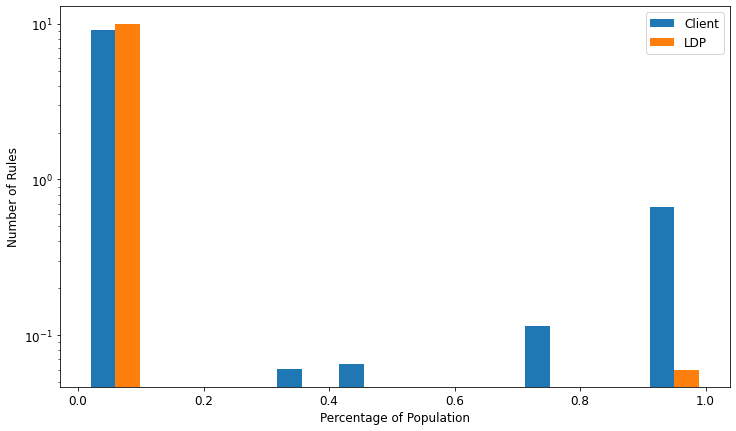

In [72]:
#make list of rule counts x population percents

lst = []
for idx, row in clientDF.iterrows():
    lst.extend([row['Percent of Population'] for i in range(row['Rule Count'])])
    
n_bins = 10

plt.figure(figsize=(12, 7))
plt.hist([lst, countDF['Client Count'].values], n_bins, density=True, histtype='bar',label=['Client', 'LDP'])
plt.xlabel("Percentage of Population")
plt.ylabel("Number of Rules")
plt.yscale('log')
plt.legend()
